# Simple Exploratory Data Analysis on financial data

## Objective of the notebook
- import and visual financial data using [OpenBB](https://docs.openbb.co/odp/python/reference): 

In [47]:
# Main imports

import datetime 
from openbb import obb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
# load relevant data
output = obb.equity.price.historical("AAPL")
df = output.to_dataframe()

In [32]:
# check data
df.head()

,open,high,low,close,volume,dividend
date,,,,,,
2025-02-03,229.990005,231.830002,225.699997,228.009995,73063300,0.0
2025-02-04,227.250000,233.130005,226.649994,232.800003,45067300,0.0
2025-02-05,228.529999,232.669998,228.270004,232.470001,39620300,0.0
2025-02-06,231.289993,233.800003,230.429993,233.220001,29925300,0.0
2025-02-07,232.600006,234.000000,227.259995,227.630005,39707200,0.0


In [33]:
# Transform index into proper dates
df.index = pd.to_datetime(df.index)

In [49]:
def simple_plot(df: pd.DataFrame, parameter_to_plot: str) -> None:
    plt.figure(figsize=(15,5))
    sns.lineplot(df[parameter_to_plot])
    plt.xlabel('Date')
    plt.ylabel(parameter_to_plot)
    plt.show()
    plt.style.use("dark_background")

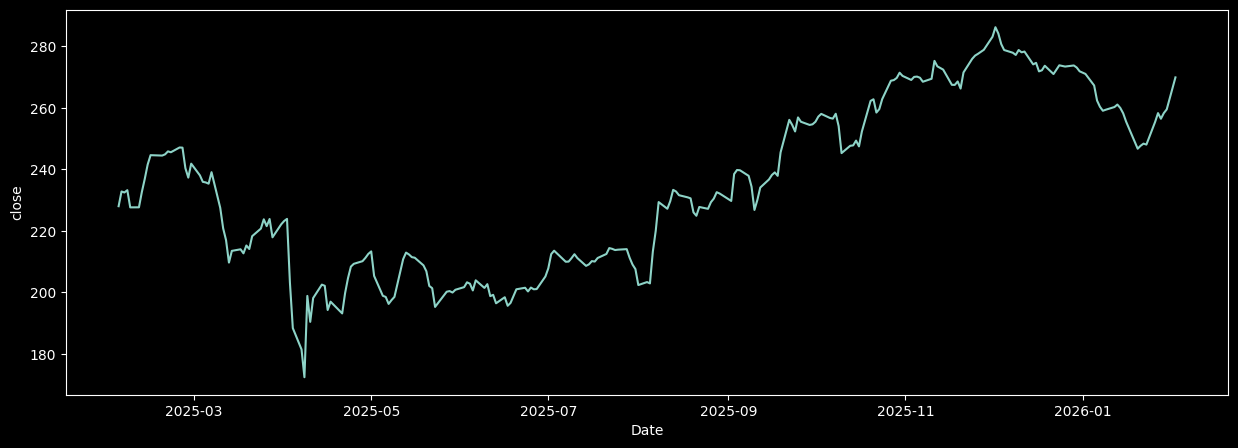

In [50]:
# Simple plot of the price across time
simple_plot(df, 'close')

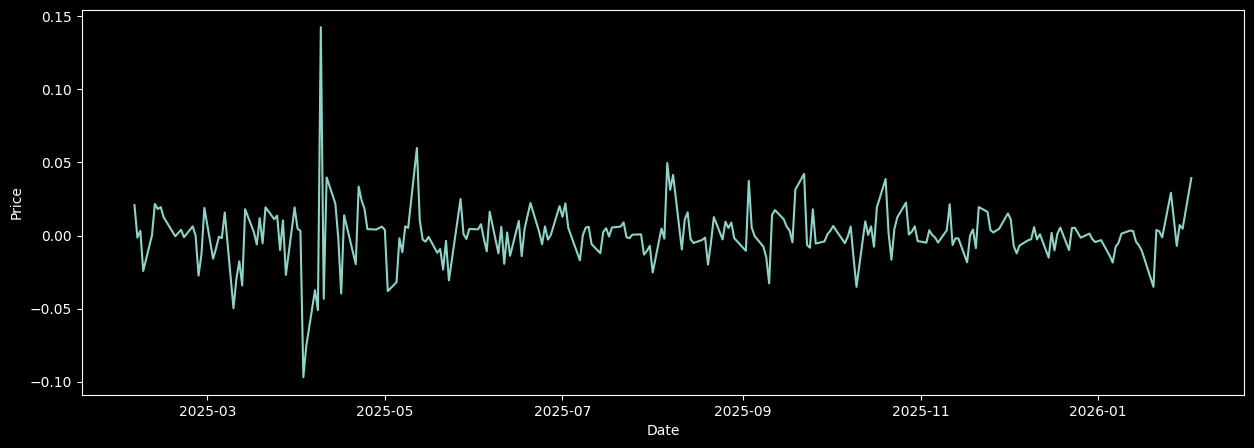

In [48]:
# Return and Log return

def add_return(df: pd.DataFrame, price_col: str = "close") -> pd.DataFrame:
    out = df.copy()
    p = out[price_col].astype(float)
    out["ret"] = p.pct_change()
    out["log_ret"] = np.log(p).diff()
    return out

df = add_return(df)

simple_plot(df, 'log_ret')

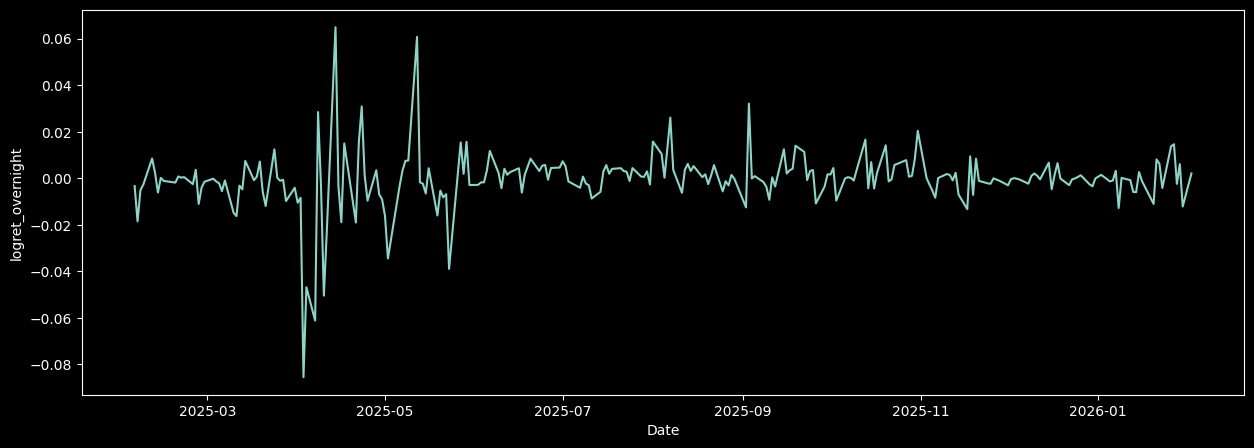

In [51]:
# Open to close and overnight returns

def add_session_returns(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    o = out['open'].astype(float)
    c = out['close'].astype(float)
    out["ret_oc"] = (c / o) - 1.0
    out["logret_oc"] = np.log(c) - np.log(o)

    out["ret_overnight"] = (o / c.shift(1)) - 1.0
    out["logret_overnight"] = np.log(o) - np.log(c.shift(1))
    return out

df = add_session_returns(df)

simple_plot(df, "logret_overnight")